# Parcial 1

**Entregado por:**
- Sofia Quintero H
- Maria Alejandra Fernandez


In [26]:
# Instalar librerías necesarias
!pip install -q numpy pandas matplotlib seaborn

In [27]:
# Librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo bonito para las gráficas
sns.set_theme(style='whitegrid', palette='pastel')
plt.rcParams.update({'figure.figsize': (10,5), 'font.size': 11})

In [28]:
# Base de datos
data = {
    'Producto': ['A', 'B', 'C', 'D', 'E', 'F'],
    'Ventas': [120, 340, 290, 410, 150, 380],
    'Costo': [80, 200, 180, 260, 90, 240],
    'Categoria': ['Tecnología', 'Hogar', 'Tecnología', 'Hogar', 'Oficina', 'Tecnología'],
    'Mes': ['Enero', 'Enero', 'Febrero', 'Febrero', 'Marzo', 'Marzo']
}
df = pd.DataFrame(data)
df

,Producto,Ventas,Costo,Categoria,Mes
0,A,120,80,Tecnología,Enero
1,B,340,200,Hogar,Enero
2,C,290,180,Tecnología,Febrero
3,D,410,260,Hogar,Febrero
4,E,150,90,Oficina,Marzo
5,F,380,240,Tecnología,Marzo


## Pregunta 1 - NumPy (Vectores y operaciones)

Cree un arreglo de NumPy con las ventas del DataFrame y realice lo siguiente:

a) Calcule el promedio, el valor máximo y mínimo.

Explique brevemente qué hace cada operación.

In [29]:
# Crear arreglo de NumPy con las ventas
ventas_array = np.array(df['Ventas'])

promedio = np.mean(ventas_array) # Calcula el promedio
maximo = np.max(ventas_array) # Calcula el valor máximo
minimo = np.min(ventas_array) # Calcula el valor mínimo

print(f'Promedio de ventas: {promedio}')
print(f'Venta máxima: {maximo}')
print(f'Venta mínima: {minimo}')

Promedio de ventas: 281.6666666666667
Venta máxima: 410
Venta mínima: 120


Explicación:

- np.mean() calcula el promedio de todas las ventas
- np.max() encuentra el valor más alto de ventas
- np.min() encuentra el valor más bajo de ventas

## Pregunta 2 - NumPy (Condiciones)

Usando NumPy, cree un arreglo que indique con 1 si la venta es mayor a 300 y 0 en caso contrario.

No use ciclos (for).

In [30]:
# Crear arreglo con 1 si venta > 300, 0 en caso contrario
ventas_mayores = np.where(ventas_array > 300, 1, 0)
print('Ventas mayores a 300 (1=sí, 0=no):', ventas_mayores)

Ventas mayores a 300 (1=sí, 0=no): [0 1 0 1 0 1]


## Pregunta 3 - Pandas (Columnas calculadas)

Agregue una nueva columna llamada Ganancia, calculada como:

Ganancia = Ventas - Costo

Luego:
- Muestre las primeras filas del DataFrame
- Indique qué productos tienen ganancia mayor a 100

In [31]:
# Calcular ganancia
df['Ganancia'] = df['Ventas'] - df['Costo']

# Mostrar primeras filas
print('DataFrame con Ganancia:')
print(df.head())

# Calcular productos con ganancia mayor a 100
print('Productos con ganancia mayor a 100:')
productos_mayor_100 = df[df['Ganancia'] > 100]
print(productos_mayor_100[['Producto', 'Ganancia']])

DataFrame con Ganancia:
  Producto  Ventas  Costo   Categoria      Mes  Ganancia
0        A     120     80  Tecnología    Enero        40
1        B     340    200       Hogar    Enero       140
2        C     290    180  Tecnología  Febrero       110
3        D     410    260       Hogar  Febrero       150
4        E     150     90     Oficina    Marzo        60
Productos con ganancia mayor a 100:
  Producto  Ganancia
1        B       140
2        C       110
3        D       150
5        F       140


## Pregunta 4 - Pandas (Filtros y condiciones)

Filtre el DataFrame para mostrar solo los productos de la categoría Tecnología con ventas mayores a 300.

Muestre únicamente las columnas: Producto, Ventas, Ganancia.

In [32]:
# Filtrar Tecnología con ventas mayores a 300
filtro = df[(df['Categoria'] == 'Tecnología') & (df['Ventas'] > 300)]
resultado = filtro[['Producto', 'Ventas', 'Ganancia']]
print('Productos de Tecnología con ventas mayores a 300:')
print(resultado)

Productos de Tecnología con ventas mayores a 300:
  Producto  Ventas  Ganancia
5        F     380       140


## Pregunta 5 - Pandas (Agrupaciones)

Agrupe la información por Mes y calcule:
- Ventas totales por mes
- Ganancia promedio por mes

Explique la diferencia entre sum() y mean().

In [33]:
# Agrupar por mes las ventas totales y ganancia promedio
ventas_por_mes = df.groupby('Mes')['Ventas'].sum()
ganancia_promedio_mes = df.groupby('Mes')['Ganancia'].mean()

print('Ventas totales por mes:')
print(ventas_por_mes)
print('Ganancia promedio por mes:')
print(ganancia_promedio_mes)

Ventas totales por mes:
Mes
Enero      460
Febrero    700
Marzo      530
Name: Ventas, dtype: int64
Ganancia promedio por mes:
Mes
Enero       90.0
Febrero    130.0
Marzo      100.0
Name: Ganancia, dtype: float64


Explicación

- sum() suma todos los valores del grupo (ventas totales)
- mean() calcula el promedio de los valores del grupo (ganancia promedio)

## Pregunta 6 - Matplotlib (Gráfico básico)

Realice un gráfico de barras que muestre las ventas por producto.

El gráfico debe incluir:
- Título
- Nombre de los ejes
- Rotación de etiquetas si es necesario

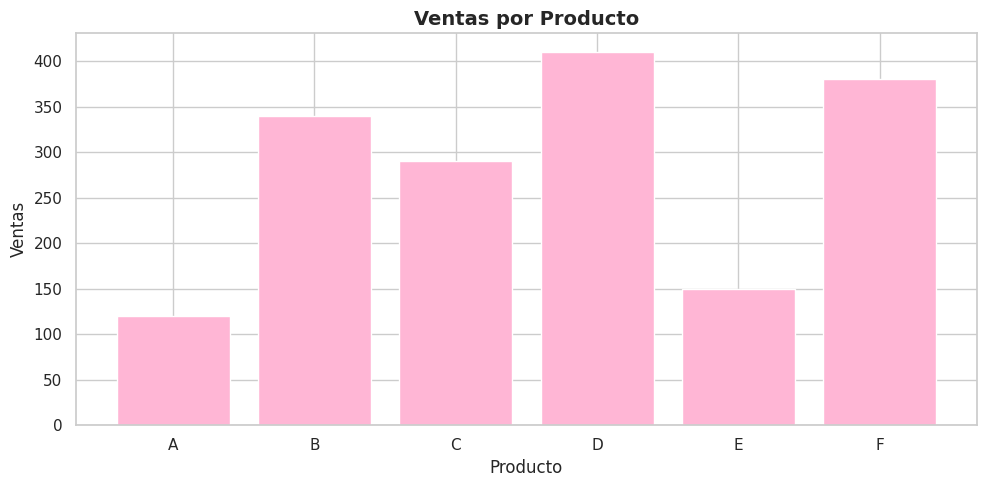

In [41]:
# Gráfico de barras de ventas por producto
plt.figure(figsize=(10,5))
plt.bar(df['Producto'], df['Ventas'], color='#ffb6d5')
plt.title('Ventas por Producto', fontsize=14, fontweight='bold')
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Pregunta 7 - Matplotlib (Gráfico comparativo)

Cree un gráfico de líneas que compare Ventas vs Costo por producto.

Use una leyenda adecuada y explique qué tendencia observa.

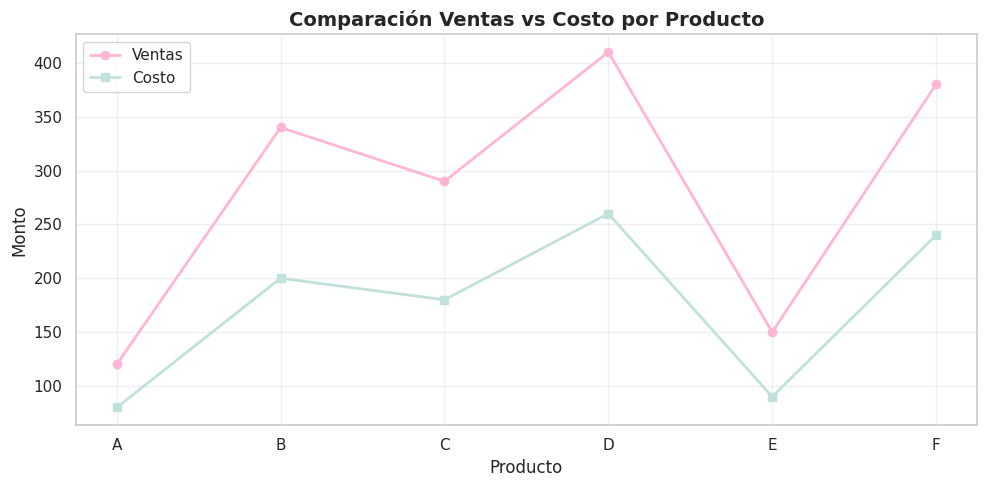

In [35]:
# Gráfica de líneas comparando Ventas vs Costo
plt.figure(figsize=(10,5))
plt.plot(df['Producto'], df['Ventas'], marker='o', label='Ventas', color='#ffb6d5', linewidth=2)
plt.plot(df['Producto'], df['Costo'], marker='s', label='Costo', color='#c1e1dc', linewidth=2)
plt.title('Comparación Ventas vs Costo por Producto', fontsize=14, fontweight='bold')
plt.xlabel('Producto')
plt.ylabel('Monto')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Tendencia: Las ventas son mayores que los costos en todos los productos, lo que demuestra que todos son rentables. Adicionalmente, el producto D presenta las ventas más altas, seguido de los productos F y B.

## Pregunta 8 – Seaborn (Gráfico estadístico)

Utilizando Seaborn, realice un boxplot de las ventas por categoría.
¿Qué categoría presenta mayor variabilidad en ventas? Justifique.

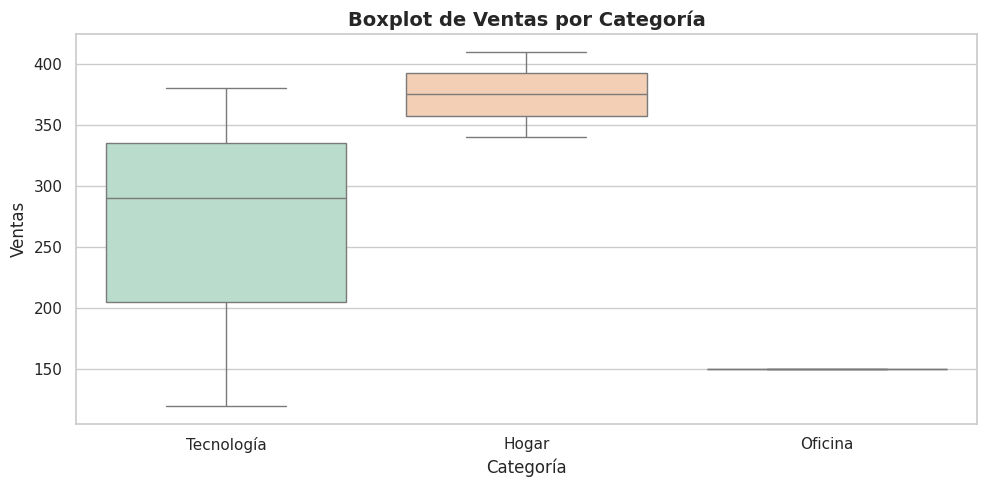

In [39]:
# Boxplot de ventas por categoría
plt.figure(figsize=(10,5))
sns.boxplot(x='Categoria', y='Ventas', data=df, hue='Categoria', palette='Pastel2', legend=False)
plt.title('Boxplot de Ventas por Categoría', fontsize=14, fontweight='bold')
plt.xlabel('Categoría')
plt.ylabel('Ventas')
plt.tight_layout()
plt.show()

La categoría Tecnología presenta mayor variabilidad en ventas, ya que tiene un rango más amplio (de 120 a 380) y más productos, lo que hace es un diagrama de cajas con mayor dispersión. Las categorías Hogar y Oficina tienen menos variabilidad debido a menos datos y valores más cercanos.

## Pregunta 9 – Seaborn (Relación entre variables)

Realice un scatterplot entre Ventas y Ganancia, diferenciando por categoría.
Explique la relación observada entre ventas y ganancia.

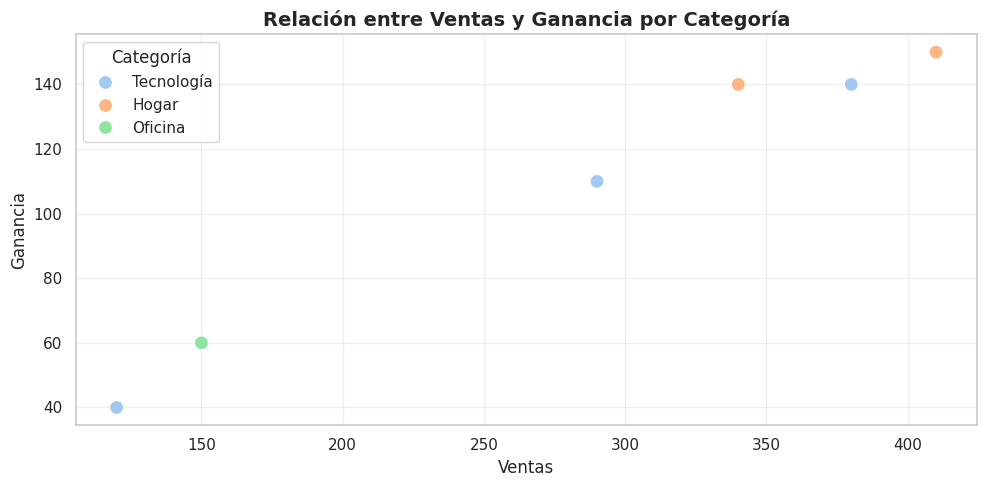

In [37]:
# Scatterplot entre Ventas y Ganancia, diferenciando por categoría
plt.figure(figsize=(10,5))
sns.scatterplot(x='Ventas', y='Ganancia', hue='Categoria', data=df, palette='pastel', s=100)
plt.title('Relación entre Ventas y Ganancia por Categoría', fontsize=14, fontweight='bold')
plt.xlabel('Ventas')
plt.ylabel('Ganancia')
plt.legend(title='Categoría')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Se observa una relación positiva entre ventas y ganancia (ya que la ganancia es ventas menos costo). Los productos con mayores ventas tienden a tener mayores ganancias. Diferenciando por categoría, Tecnología muestra mayor dispersión, mientras que Hogar y Oficina tienen puntos más agrupados.

## Pregunta 10 – Análisis final (Integración)

Con base en los análisis realizados:
a) ¿Qué producto es el más rentable?
b) ¿Qué categoría genera mayor ganancia total?
c) ¿Qué decisión comercial tomaría a partir de los datos?
Justifique usando resultados obtenidos con Pandas o gráficos.

In [43]:
# a) Producto más rentable
producto_mas_rentable = df.loc[df['Ganancia'].idxmax(), 'Producto']
ganancia_max = df['Ganancia'].max()
print(f'a) El producto más rentable es {producto_mas_rentable} con una ganancia de: {ganancia_max}')

# b) Categoría con mayor ganancia total
ganancia_por_categoria = df.groupby('Categoria')['Ganancia'].sum()
categoria_mayor_ganancia = ganancia_por_categoria.idxmax()
ganancia_total = ganancia_por_categoria.max()
print(f'b) La categoría con mayor ganancia es {categoria_mayor_ganancia} con: {ganancia_total}')

a) El producto más rentable es D con una ganancia de: 150
b) La categoría con mayor ganancia es Hogar con: 290


a) El producto D tiene la mayor ganancia (150), como se vio en los datos despues del filtrado en la Pregunta 3.

b) La categoría Hogar genera la mayor ganancia total (310), calculada agrupando por categoría en la Pregunta 5.

c) Basado en los gráficos de barras y líneas, y el scatterplot, se recomienda invertir en Tecnología por su variabilidad y potencial, y en el producto D por su alta rentabilidad.

Decisión: Enfocarse en promocionar productos de la categoría Tecnología, especialmente el producto D, ya que genera la mayor ganancia y tiene alta variabilidad en ventas.